In [ ]:
!pip install -q dash
!pip install -q jupyter_dash
!pip install -q dash-cytoscape
!pip install -q chart-studio

In [ ]:
import chart_studio
username=#plotly username
api_key=#plotly api_key
chart_studio.tools.set_credentials_file(username=username,
                                        api_key=api_key)

In [ ]:
# Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output, callback_context
from jupyter_dash import JupyterDash  # pip install dash
import dash_cytoscape as cyto  # pip install dash-cytoscape==0.2.0 or higher
from nltk.stem.porter import PorterStemmer
import random
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from textblob import TextBlob
from tqdm.notebook import tqdm
from collections import Counter
from nltk import ngrams
from textblob import TextBlob
from wordcloud import WordCloud, ImageColorGenerator
import chart_studio.plotly as py
import chart_studio.tools as tls
from plotly.subplots import make_subplots
import plotly.graph_objects as go
font_params=dict(
        family='cursive',
        size=8,
        color="black"
    )

In [ ]:
df=pd.read_csv('/content/data_with_duration.csv')
df=df.iloc[:,1:7]
df.drop(df[df['name']==" 'you know what i mean like to make a'"].index,inplace=True) # For some reason, one record had garbage data.
df=df[df['transcripts']!="[]"]
df['length']=df['length'].astype('float') # Vonverting length into float.
df = df.reset_index(drop=True)
df.head()

,name,videoId,title,date,transcripts,length
0,Jeff Nippard,Pok0Jg2JAkE,The Smartest Way To Use Protein To Build Muscl...,2022-04-07T15:01:15Z,"['and i would eat three to four hundred', 'gra...",10.33
1,Jeff Nippard,LrDJXIQ_-eg,How Strong Should You Be? (Noob To Freak),2021-11-09T16:02:26Z,"[""in this video i'm going to outline some"", 'r...",14.00
2,Jeff Nippard,d8V9ZaSq9Oc,The Smartest Way To Get Lean (Shredding Scienc...,2021-02-02T21:47:09Z,"[""so in this video i'm asking five highly"", 'q...",18.33
3,Jeff Nippard,jkaU-mM24_o,Partial Range Of Motion: Broscience Or Legit?,2021-01-03T22:09:43Z,"[""range of motion simply put it's the"", 'degre...",10.18
4,Jeff Nippard,OPEDjl88P-4,How To Get Bigger & Stronger At The Same Time ...,2021-01-03T22:10:31Z,"['how can we get really jacked and also', 'rea...",13.02


# Cleaning and Preprocessing

In [ ]:

def clean(col):
  snow = nltk.stem.SnowballStemmer('english')
  stopwords= set(['music','br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't","jeff", "cavalier", "athleanx", "com","coach", "greg",'thank', 'guy', 'much','video',\
            'subscribe','like','comment','share','cavaliere','"','i',"don't",'im','gonna','"i', 'dont','"it', 'not','ATHLEANX',
            'Cavaliere ATHLEANX','Athlean','Cavalier','Jeff Cavaliere','go','get','guy','link','leave','description'])
  temp=[]
  for sentence in col:
    sentence = sentence.lower()

    cleanr = re.compile('<.*?>')
    pattern = r'\[.*?\]'
    sentence = re.sub(cleanr,'',sentence) 
    sentence=re.sub(r"[\([{})\]]", r'', sentence)
    sentence = re.sub(r'[?|!|\'|*|#]' ,r'' ,sentence)
    sentence = re.sub(r'[.|,|)|(|\|/]' ,r' ',sentence)
    sentence = re.sub( r'[0-9]', '', sentence)
    words = [snow.stem(word) for word in sentence.split() if word not in stopwords]
    temp.append(' '.join(words))
    t=temp
    t1=pd.Series(temp)
  return pd.Series(temp)
df['transcripts']=clean(df['transcripts'])
df.dropna(inplace=True)
df = df.reset_index(drop=True)
df['title']=clean(df['title'])
df.dropna(inplace=True)
df = df.reset_index(drop=True)


# Duration

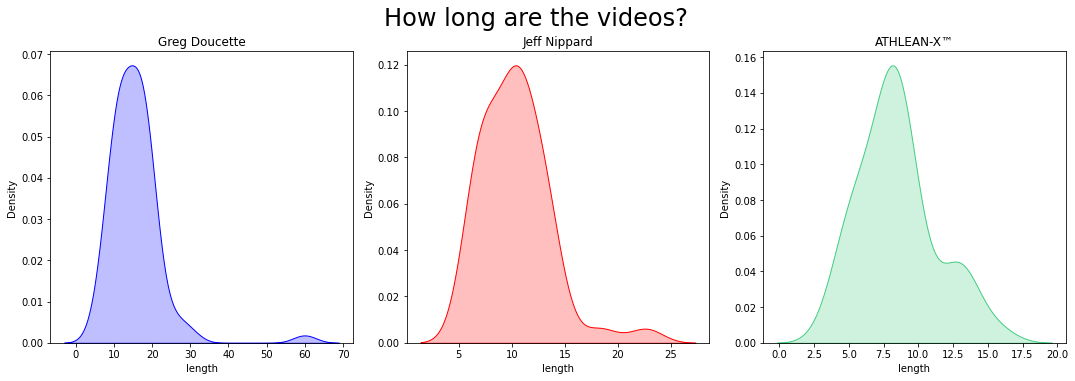

In [ ]:
names = df['name'].value_counts().index
colors=['blue','#FF0000','#43CD80']
fig,axes=plt.subplots(1,3,figsize=(15,5))
fig.suptitle('How long are the videos?',fontsize=24,y=1.05)
axes.ravel()
for j,name in enumerate(names):
  ax=sns.kdeplot(x=df[df['name']==name]['length'],\
                 ax=axes[j],\
                 color=colors[j],fill=True)
  ax.set_title(name)
fig.tight_layout()

# Titles

In [ ]:
names=df['name'].value_counts().index
indexes=[[1,1],  [1,2], [2,1],  [2,2]]
# Create subplots, using 'domain' type for pie charts
specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=2, specs=specs)
for j,name in enumerate(names):
  text=''
  text= ''.join(str(i) for i in df[df['name']==name]['title'].values)
  ngram_counts = Counter(ngrams(text.split(), 2))
  n_grams=[]
  frequency=[]
  for i in ngram_counts.most_common(5):
    n_grams.append(i[0][0]+" "+i[0][1])
    frequency.append(i[1])
  fig.add_trace(go.Pie(labels=n_grams,values=frequency,name=name),indexes[j][0],indexes[j][1])

#fig['layout']['yaxis2'].update(side='right')
fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title='Pi charts for Titiles',
    title_pad_l=300,
    showlegend=False,
    annotations=[dict(text='Greg', x=0.195, y=0.83, font_size=20, showarrow=False),
                 dict(text='Jeff', x=0.8, y=0.83, font_size=20, showarrow=False),
                 dict(text='Athlean', x=0.181, y=0.17, font_size=20, showarrow=False)]
                  )

fig.show()
#py.plot(fig, filename="Titles bi-grams", auto_open = True) # uncomment to upload this to your plotly account.
#Pictures can be added from plotly dashboard itself.

# Analysis

In [ ]:
plot_data=df['name'].value_counts()
fig=px.histogram(x=[i for i in plot_data.index],y=[j for j in plot_data.values],color=[j for j in plot_data.values])
fig.update_layout(
    title='Most Number of Videos',
    title_pad_l=300,
    xaxis_title="Youtuber Name",
    yaxis_title="Number of Videos",
    legend_title='Video Count',
    font=font_params
)
#py.plot(fig, filename="Number of Videos", auto_open = True)

In [ ]:
names=df['name'].value_counts().index #list of all the names in the dataset
indexes=[[1,1],  [1,2], [2,1],  [2,2]] # easier indexing of plotly subplots
fig = make_subplots(rows=2, cols=2,subplot_titles=names)
for j,name in enumerate(names):
  text=''
  text=''.join(i for i in df[df['name']==name]['transcripts'].values)
  ngram_counts = Counter(ngrams(text.split(), 1))
  n_grams=[]
  frequency=[]
  for i in ngram_counts.most_common(10):
    n_grams.append(i[0][0])
    frequency.append(i[1])
  fig.add_trace(go.Bar(x=n_grams,y=frequency),row=indexes[j][0],col=indexes[j][1])
fig.update_layout(
    title='Most frequent words',
    title_pad_l=200,
    showlegend=False,
    font=font_params
)
fig.update_xaxes(tickangle=-45)
fig.show()
#py.plot(fig, filename="uni-grams", auto_open = True)

In [ ]:
names=df['name'].value_counts().index
fig = make_subplots(rows=2, cols=2,subplot_titles=names)
indexes=[[1,1],  [1,2], [2,1],  [2,2]]
for j,name in enumerate(names):
  text=''
  text= ''.join(i for i in df[df['name']==name]['transcripts'].values)
  ngram_counts = Counter(ngrams(text.split(), 2))
  n_grams=[]
  frequency=[]
  for i in ngram_counts.most_common(10):
    n_grams.append(i[0][0]+" "+i[0][1])
    frequency.append(i[1])
  fig.add_trace(go.Bar(y=n_grams,x=frequency,orientation='h'),row=indexes[j][0],col=indexes[j][1])
fig.update_layout(
    title='Bi-grams',
    title_pad_l=300,
    showlegend=False,
    font=font_params
)
fig.show()
#py.plot(fig, filename="bi-grams", auto_open = True)

In [ ]:
names=df['name'].value_counts().index
fig = make_subplots(rows=2, cols=2,subplot_titles=names)
indexes=[[1,1],  [1,2], [2,1],  [2,2]]
for j,name in enumerate(names):
  text=''
  text= ''.join(i for i in df[df['name']==name]['transcripts'].values)
  ngram_counts = Counter(ngrams(text.split(), 3))
  #ngram_counts.most_common(10)
  n_grams=[]
  frequency=[]
  for i in ngram_counts.most_common(10):
    n_grams.append(i[0][0]+" "+i[0][1]+" "+i[0][2])
    frequency.append(i[1])
  fig.add_trace(go.Bar(y=n_grams,x=frequency,orientation='h',cliponaxis = False),row=indexes[j][0],col=indexes[j][1])
fig.update_layout(
    title='Tri-grams',
    title_pad_l=300,
    showlegend=False,
    font=font_params
)
fig.show()
#py.plot(fig, filename="tri-grams", auto_open = True)

**Word cloud**

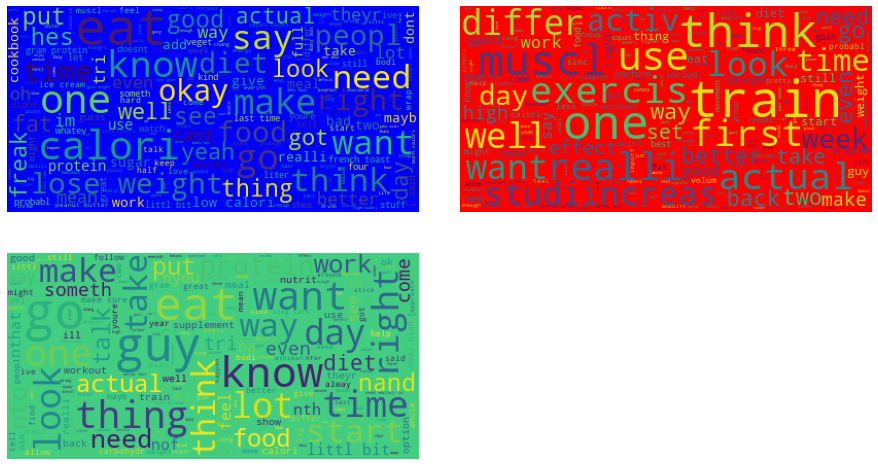

In [ ]:
names=df['name'].value_counts().index
fig,axes=plt.subplots(2,2,figsize=(15,15))
background_color=['blue','red',	'#43CD80']
indexes=[[0,0],[0,1],[1,0],[1,1]]
for i,name in enumerate(df['name'].value_counts().index):
  text=''
  text= ''.join(i for i in df[df['name']==name]['transcripts'].values)
  wordcloud = WordCloud(
                      background_color = background_color[i], 
                      max_font_size = 50).generate(text)
  axes[indexes[i][0]][indexes[i][1]].imshow(wordcloud)
  axes[indexes[i][0]][indexes[i][1]].axis('off')
axes[indexes[i+1][0]][indexes[i+1][1]].remove()
fig.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=-0.6)
plt.show()